<a href="https://colab.research.google.com/github/Praneesh-Sharma/Sentiment-Analysis-on-Amazon-Reviews/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis



Sentiment Analysis, also known as opinion mining, is a technique used in Natural Language Processing (NLP) to determine the emotional undertone of a document. This can be performed on Emails, Blogs, Support Tickets, Web Chats, Forums, Comments, and much more.

## Types of Senitment Analysis

**Binary Sentiment Analysis:**
This is the simplest form of sentiment analysis, where the goal is to classify text as either positive or negative sentiment. The output is binary, indicating whether the text expresses a positive or negative opinion. This type of analysis is commonly used for sentiment classification in reviews, social media comments, and customer feedback.

**Multi-class Sentiment Analysis:**
In multi-class sentiment analysis, text is classified into more than two sentiment classes. These classes can include positive, negative, neutral, and potentially additional categories like very positive, very negative, or mixed sentiments. This approach provides a more nuanced understanding of sentiment in text, allowing for a wider range of emotional tones to be captured.

**Emotion Analysis:**
Instead of just classifying text as positive, negative, or neutral, emotion analysis aims to identify specific emotions conveyed in the text, such as happiness, sadness, anger, fear, and more. This type of analysis is particularly useful for understanding the emotional nuances in social media posts, customer reviews, and content marketing.

**Aspect-based Sentiment Analysis:**
In aspect-based sentiment analysis, the goal is to analyze sentiment towards specific aspects or entities within the text. For example, in a product review, this approach would identify sentiment towards various features of the product separately. This allows for a more detailed and fine-grained understanding of sentiment within the context of different aspects.

**Fine-grained Sentiment Analysis:**
Fine-grained sentiment analysis goes beyond binary or multi-class categorization and assigns sentiment scores on a continuous scale. This means that instead of simply labeling text as positive or negative, a sentiment score is assigned that represents the intensity of sentiment. This approach is more nuanced and captures the varying degrees of positivity or negativity in the text.

**Temporal Sentiment Analysis:**
Temporal sentiment analysis focuses on tracking changes in sentiment over time. This can involve analyzing how sentiment towards a particular topic or entity evolves across different time periods, such as days, weeks, or months. It's particularly useful for monitoring public opinion trends and responses to events.

## Applications of Sentiment Analysis in Real World:

**Business Reviews:** Sentiment analysis helps companies gauge customer opinions from online reviews, enabling improvements in products and services.

**Social Media Monitoring:** Brands track sentiment on platforms like Twitter to manage their online reputation and engage with users effectively.

**Market Research:** Sentiment analysis aids in understanding consumer preferences and predicting market trends through analysis of online discussions.

**Political Analysis:** Analyzing public sentiment in political speeches and news articles assists in assessing voter opinions and shaping campaign strategies.

**Customer Support:** Sentiment analysis in customer interactions enables swift identification and resolution of negative experiences, enhancing satisfaction.

**Financial Forecasting:** Sentiment analysis of financial news and reports contributes to predicting stock market movements based on investor sentiment.

**Healthcare Feedback:** Hospitals use sentiment analysis on patient feedback to enhance healthcare services and address concerns promptly.

**Product Launches:** Companies assess sentiment pre- and post-product launch to adjust marketing strategies and improve product perception.

**Academic Research:** Sentiment analysis aids researchers in understanding public opinions on various subjects for social and behavioral studies.

**Brand Campaigns:** By analyzing sentiment, advertisers tailor campaigns to resonate with target audiences and elicit desired emotional responses.

# Project

## Importing Libraries

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk
nltk.download('all')

## Reading the dataset

In [10]:
df = pd.read_csv('Reviews.csv')
print(df.shape)

(16243, 10)


In [11]:
#reducing the dataset to first 100 rows
num=100 #change this value to explore
df = df.head(num)
print(df.shape)

(100, 10)


In [13]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1.0,1.0,5.0,1.303862e+09,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0.0,0.0,1.0,1.346976e+09,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1.0,1.0,4.0,1.219018e+09,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3.0,3.0,2.0,1.307923e+09,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0.0,0.0,5.0,1.350778e+09,Great taffy,Great taffy at a great price. There was a wid...


## Exploratory Data Analysis

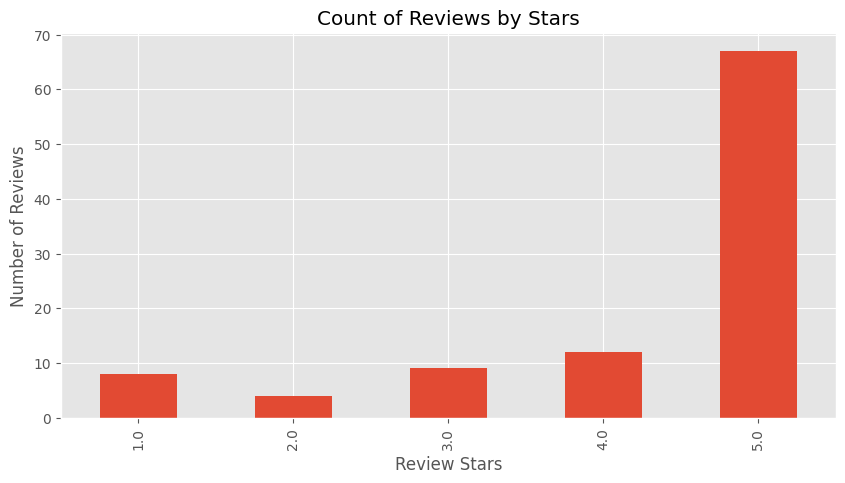

In [24]:
ax = df['Score'].value_counts().sort_index().plot(
          kind='bar',
          title='Count of Reviews by Stars',
          figsize=(10, 5))
ax.set_xlabel('Review Stars')
ax.set_ylabel('Number of Reviews')
plt.show()

## NLTK

NLTK stands for Natural Language Toolkit. It is a powerful Python library used for working with human language data (text) and performing various natural language processing (NLP) tasks. NLTK provides a wide range of tools, resources, and libraries that assist researchers, developers, and linguists in building applications related to language analysis and text processing.

In [17]:
example = df['Text'][4]
print(example)

Great taffy at a great price.  There was a wide assortment of yummy taffy.  Delivery was very quick.  If your a taffy lover, this is a deal.


### Tokenization

Tokenization is a fundamental process in natural language processing (NLP) that involves breaking down a piece of text, such as a sentence or paragraph, into smaller units called tokens.

In [21]:
tokens = nltk.word_tokenize(example)
tokens[:20]

['Great',
 'taffy',
 'at',
 'a',
 'great',
 'price',
 '.',
 'There',
 'was',
 'a',
 'wide',
 'assortment',
 'of',
 'yummy',
 'taffy',
 '.',
 'Delivery',
 'was',
 'very',
 'quick']

*nltk.pos_tag* :

pos_tag stands for "part-of-speech tagging," and the function is used to assign grammatical parts of speech (such as nouns, verbs, adjectives, etc.) to each word in a sentence.

[Table](https://www.guru99.com/pos-tagging-chunking-nltk.html)

In [22]:
tagged = nltk.pos_tag(tokens)
tagged[:20]

[('Great', 'NNP'),
 ('taffy', 'NN'),
 ('at', 'IN'),
 ('a', 'DT'),
 ('great', 'JJ'),
 ('price', 'NN'),
 ('.', '.'),
 ('There', 'EX'),
 ('was', 'VBD'),
 ('a', 'DT'),
 ('wide', 'JJ'),
 ('assortment', 'NN'),
 ('of', 'IN'),
 ('yummy', 'NN'),
 ('taffy', 'NN'),
 ('.', '.'),
 ('Delivery', 'NNP'),
 ('was', 'VBD'),
 ('very', 'RB'),
 ('quick', 'JJ')]

## Method 1: VADER (Valence Aware Dictionary and Sentiment Reasoner)

VADER operates based on a lexicon of words and their associated sentiment scores. Words in the lexicon are assigned sentiment scores ranging from -1 (most negative) to +1 (most positive). The lexicon also considers the intensity of sentiment and includes rules to handle cases where negation or capitalization affects sentiment polarity.

This uses a "bag of words" approach:
* Stop words are removed (examples: a, an, the, of, on, etc)
* Each word is scored individually and combined to a total score. (does not factor in relationships among the words)

### Code

In [26]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [30]:
text = "I am so happy!" #enter sample text here
# text = "I am so angry!"
sia.polarity_scores(text)

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [31]:
sia.polarity_scores(example)

{'neg': 0.0, 'neu': 0.552, 'pos': 0.448, 'compound': 0.9468}

In [48]:
# running polarity_scores on the entire dataframe
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/100 [00:00<?, ?it/s]

In [36]:
# first 5 key value pairs of dictionary
dict(list(res.items())[0: 5])

{1: {'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'compound': 0.9441},
 2: {'neg': 0.138, 'neu': 0.862, 'pos': 0.0, 'compound': -0.5664},
 3: {'neg': 0.091, 'neu': 0.754, 'pos': 0.155, 'compound': 0.8265},
 4: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 5: {'neg': 0.0, 'neu': 0.552, 'pos': 0.448, 'compound': 0.9468}}

In [41]:
df.Text[0]
# df.Text[1]
# df.Text[2]
# df.Text[3]
# df.Text[4]

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [47]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df, how='left') #merged vaders to the left of original dataframe
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1.0,1.0,5.0,1.303862e+09,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0.0,0.0,1.0,1.346976e+09,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1.0,1.0,4.0,1.219018e+09,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3.0,3.0,2.0,1.307923e+09,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0.0,0.0,5.0,1.350778e+09,Great taffy,Great taffy at a great price. There was a wid...


### VADER Results

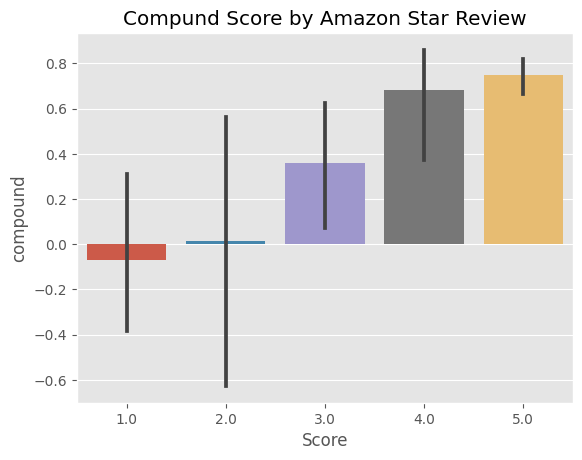

In [49]:
ax = sns.barplot(data=vaders, x='Score', y='compound')
ax.set_title('Compund Score by Amazon Star Review')
plt.show()

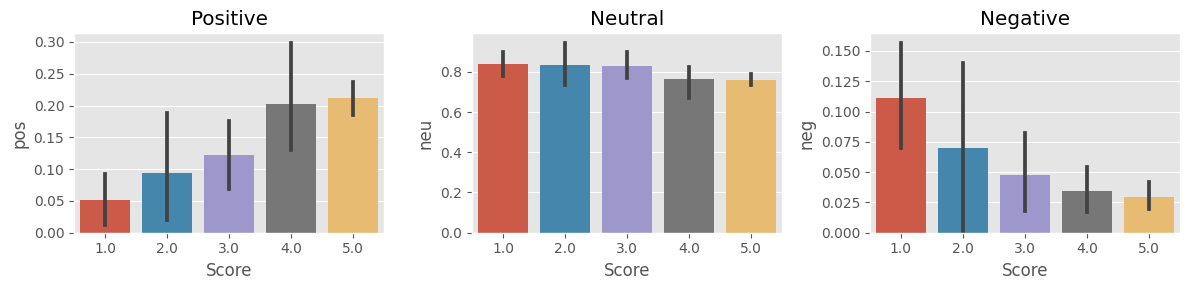

In [52]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='Score', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Score', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Score', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

## Method 2: Pretrained HuggingFace Model RoBERTa

The RoBERTa (A Robustly Optimized BERT Pretraining Approach) model is a variant of the BERT (Bidirectional Encoder Representations from Transformers) model, which is a highly influential pre-trained language representation model developed by Google.

* Model trained on a large corpus of data
* Considers the relationships among the words

### Code

In [54]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 38.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 27.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 67.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 53.2 MB/s eta 0:00:00


In [55]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [56]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [58]:
# VADER results on example
print(example)
sia.polarity_scores(example)

Great taffy at a great price.  There was a wide assortment of yummy taffy.  Delivery was very quick.  If your a taffy lover, this is a deal.


{'neg': 0.0, 'neu': 0.552, 'pos': 0.448, 'compound': 0.9468}

In [60]:
# RoBERTa model results
encoded_text = tokenizer(example, return_tensors='pt') #(return_tensors='pt') parameter specifies that you want the tokenized output to be returned in the form of PyTorch tensors. The 'pt' stands for PyTorch.
output = model(**encoded_text) #** is a syntax in Python called "dictionary unpacking." It's used to pass the contents of the encoded_text dictionary as keyword arguments to the model function.
scores = output[0][0].detach().numpy() #converting output into a numpy array
scores = softmax(scores) #softmax converts all the values into a number between 0 and 1
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.0016347291, 'roberta_neu': 0.0103024645, 'roberta_pos': 0.98806286}


In [61]:
# function of the above code cell
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [75]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['Text']
        myid = row['Id']
        # vader_result = sia.polarity_scores(text)
        # vader_result_rename = {}
        # for key, value in vader_result.items():
        #     vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        res[myid] = roberta_result
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/100 [00:00<?, ?it/s]

Broke for id 83


In [76]:
# df.Text[82]

In [77]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})
results_df = results_df.merge(df, how='left')
results_df.head()

,Id,roberta_neg,roberta_neu,roberta_pos,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.009624,0.049980,0.940395,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1.0,1.0,5.0,1.303862e+09,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.508986,0.452414,0.038600,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0.0,0.0,1.0,1.346976e+09,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.003229,0.098067,0.898704,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1.0,1.0,4.0,1.219018e+09,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.002295,0.090219,0.907486,B000UA0QIQ,A395BORC6FGVXV,Karl,3.0,3.0,2.0,1.307923e+09,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.001635,0.010302,0.988063,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0.0,0.0,5.0,1.350778e+09,Great taffy,Great taffy at a great price. There was a wid...


## Pipelines

In [78]:
from transformers import pipeline

sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [82]:
text = "I am so happy!" #enter sample text here
# text = "I am so angry!"
sent_pipeline(text)

[{'label': 'POSITIVE', 'score': 0.9998733997344971}]